In [1]:
import pandas as pd
import dataframe_image as dfi
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from tqdm import tqdm
import metrics as mtr
import operations as op
from operations import neutralize
from operations import normalize
pd.options.display.expand_frame_repr = False

import warnings
warnings.filterwarnings("ignore")

##### Read data

In [2]:
data_close = pd.read_csv('data/Close.csv', index_col='date')
data_close.index = data_close.index.astype('datetime64')
data_close.drop(columns='Unnamed: 0', inplace=True)
data_close = data_close.astype('float64')

data_open = pd.read_csv('data/Open.csv', index_col='date')
data_open.index = data_open.index.astype('datetime64')
data_open.drop(columns='Unnamed: 0', inplace=True)
data_open = data_open.astype('float64')

data_high = pd.read_csv('data/High.csv', index_col='date')
data_high.index = data_high.index.astype('datetime64')
data_high.drop(columns='Unnamed: 0', inplace=True)
data_high = data_high.astype('float64')

data_low = pd.read_csv('data/Low.csv', index_col='date')
data_low.index = data_low.index.astype('datetime64')
data_low.drop(columns='Unnamed: 0', inplace=True)
data_low = data_low.astype('float64')

data_volume = pd.read_csv('data/Volume.csv').T.iloc[1:].reset_index()
data_volume.index = data_volume['index'].astype('datetime64')
data_volume.drop(data_volume.columns [0], axis=1, inplace=True)
data_volume = data_volume.astype('float64')
data_volume.columns = data_volume.columns.astype(str)

data_returns = pd.read_csv('data/returns.csv', index_col='date')
data_returns.index = data_returns.index.astype('datetime64')
data_returns = data_returns.astype('float64')

ts_rank_close_20 = pd.read_csv('data/ts_rank_volume_20.csv', index_col='date')
ts_rank_close_20.index = ts_rank_close_20.index.astype('datetime64')
ts_rank_close_20 = ts_rank_close_20.astype('float64')

ts_rank_volume_20 = pd.read_csv('data/ts_rank_volume_20.csv', index_col='date')
ts_rank_volume_20.index = ts_rank_volume_20.index.astype('datetime64')
ts_rank_volume_20 = ts_rank_volume_20.astype('float64')

ts_rank_returns_20 = pd.read_csv('data/ts_rank_returns_20.csv', index_col='date')
ts_rank_returns_20.index = ts_rank_returns_20.index.astype('datetime64')
ts_rank_returns_20 = ts_rank_returns_20.astype('float64')

##### Create alphas

In [20]:
def alpha1(n=1, data_close=0, data_open=0, data_high=0, data_low=0, data_volume=0):
    kernel = (data_close - data_close.shift(n)) / (data_close.shift(n) + data_close)
    alpha = -kernel / data_close ** 10
    return normalize(neutralize(alpha)).fillna(0)

9.566045132770277


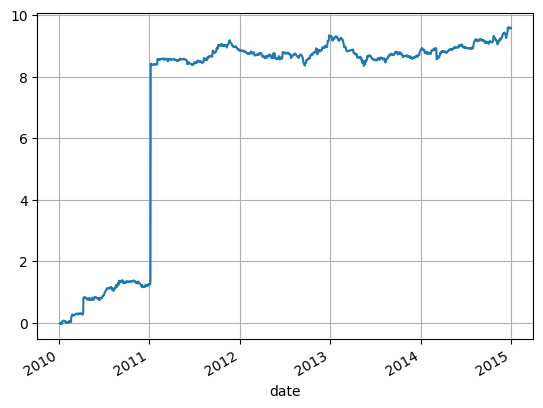

,years_pnl_cum,turnover,sharpe_coef,drawdown,drawdown_day_start,drawdown_day_end
date,,,,,,
2010,1.273312,1.305150,1.936410,0.225507,14.09.2010,08.12.2010
2011,7.578206,1.357747,1.078145,0.330551,21.11.2011,28.12.2011
2012,0.443585,1.167746,0.824349,0.499016,27.12.2012,19.09.2012
2013,-0.446899,1.450104,-0.904599,0.973519,03.01.2013,16.05.2013
2014,0.717840,1.401271,1.283534,0.367208,19.12.2014,07.03.2014


In [22]:
mtr.alpha_stats(data_returns, (alpha1(1, data_close, data_open, data_high, data_low, data_volume)))

In [23]:
def alpha2(n=1, data_close=0, data_open=0, data_high=0, data_low=0, data_volume=0):
    kernel = (data_high - data_low) * data_close  
    alpha = kernel / data_close.shift(n) / data_close ** 3
    return normalize(neutralize(alpha)).fillna(0)

3.476752461407137


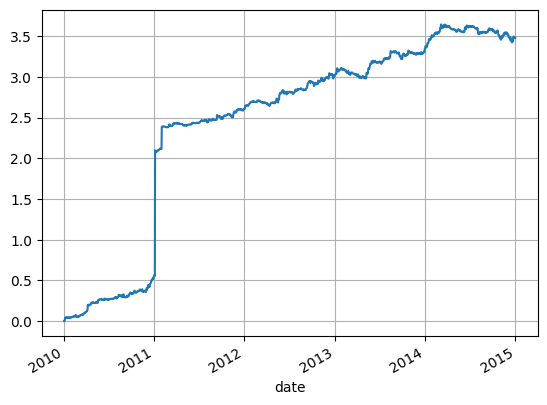

,years_pnl_cum,turnover,sharpe_coef,drawdown,drawdown_day_start,drawdown_day_end
date,,,,,,
2010,0.539105,0.305115,3.746747,0.039387,31.12.2010,09.09.2010
2011,2.066827,0.315620,1.317828,0.047212,30.12.2011,30.09.2011
2012,0.404502,0.300452,2.191817,0.070348,10.12.2012,12.04.2012
2013,0.336871,0.261469,1.755779,0.130652,31.12.2013,06.05.2013
2014,0.129447,0.246805,0.611460,0.221575,07.03.2014,18.12.2014


In [24]:
mtr.alpha_stats(data_returns, (alpha2(1, data_close, data_open, data_high, data_low, data_volume)))

In [6]:
def alpha31(n=1, data_close=0, data_open=0, data_high=0, data_low=0, data_volume=0):
    kernel = data_high + data_low - 2 * data_close
    alpha = kernel / data_open.shift(n)
    return normalize(neutralize(alpha)).fillna(0)

In [25]:
def alpha32(n=1, data_close=0, data_open=0, data_high=0, data_low=0, data_volume=0):
    kernel = (data_high + data_low < 2 * data_close.shift(n)).replace({True: 1, False: -1})
    alpha = kernel / data_close ** 3
    return normalize(neutralize(alpha)).fillna(0)

3.372610132056737


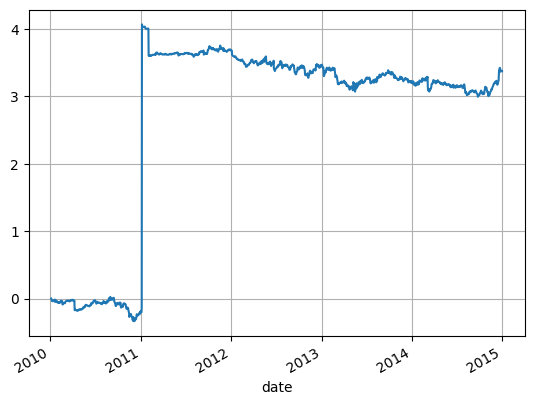

,years_pnl_cum,turnover,sharpe_coef,drawdown,drawdown_day_start,drawdown_day_end
date,,,,,,
2010,-0.190294,1.130639,-0.706306,0.359948,31.08.2010,03.12.2010
2011,3.877434,1.170654,0.917956,0.480740,06.01.2011,03.08.2011
2012,-0.240996,1.137915,-0.772629,0.406367,03.01.2012,08.11.2012
2013,-0.239747,1.079653,-0.697304,0.400038,02.01.2013,16.05.2013
2014,0.166213,1.138150,0.493570,0.294596,22.12.2014,24.09.2014


In [26]:
mtr.alpha_stats(data_returns, (alpha32(1, data_close, data_open, data_high, data_low, data_volume)))

In [8]:
def alpha33(n=1, data_close=0, data_open=0, data_high=0, data_low=0, data_volume=0):
    kernel = ((data_high * data_low) / data_close.shift(n) ** 2).copy()
    alpha = kernel
    return normalize(neutralize(alpha)).fillna(0)

In [9]:
def alpha41(n=1, data_close=0, data_open=0, data_high=0, data_low=0, data_volume=0):
    kernel = data_open / data_close.shift(n)
    alpha = kernel
    return normalize(neutralize(alpha)).fillna(0)

In [10]:
def alpha42(n=1, data_close=0, data_open=0, data_high=0, data_low=0, data_volume=0):
    kernel = (data_high - data_low) / data_close.shift(n)
    alpha = kernel
    return normalize(neutralize(alpha)).fillna(0)

In [11]:
def alpha51(n=1, data_close=0, data_open=0, data_high=0, data_low=0, data_volume=0):
    kernel = (data_close - data_low.shift(n)) / (data_high - data_low.shift(n))
    alpha = kernel
    return normalize(neutralize(alpha)).fillna(0)

In [12]:
def alpha52(n=1, data_close=0, data_open=0, data_high=0, data_low=0, data_volume=0):
    kernel = ((data_close - data_low.shift(n)) / (data_high - data_low.shift(n)) < 0.5).replace({True: 1, False: -1})
    alpha = kernel
    return normalize(neutralize(alpha)).fillna(0)

In [13]:
def alpha61(n=1, data_close=0, data_open=0, data_high=0, data_low=0, data_volume=0):
    kernel = (data_low - data_high)
    alpha = (data_close.shift(n) - data_open) / (kernel + 0.001)
    return normalize(neutralize(alpha)).fillna(0)

##### Best alphas

In [14]:
a2_matrix = alpha2(1, data_close, data_open, data_high, data_low, data_volume)
a311_matrix = alpha31(1, data_close, data_open, data_high, data_low, data_volume)
a312_matrix = op.truncate(op.get_decay_alpha(alpha31(5, data_close, data_open, data_high, data_low, data_volume), 10, 9), 0.01, 0.9)

a41_matrix = op.get_alpha_mul_ts_tank_data(alpha41(3, data_close, data_open, data_high, data_low, data_volume), ts_rank_volume_20)
a52_matrix = op.get_decay_alpha(alpha52(1, data_close, data_open, data_high, data_low, data_volume), 8, 7)
a61_matrix = op.get_alpha_mul_ts_tank_data(alpha61(2, data_close, data_open, data_high, data_low, data_volume), ts_rank_volume_20)

a611_matrix = op.truncate(-alpha61(5, data_close, data_open, data_high, data_low), 0.1, 0.9)
a612_matrix = -alpha61(15, data_close, data_open, data_high, data_low)
a613_matrix = -alpha61(7, data_close, data_open, data_high, data_low)

##### Get correlation matrix

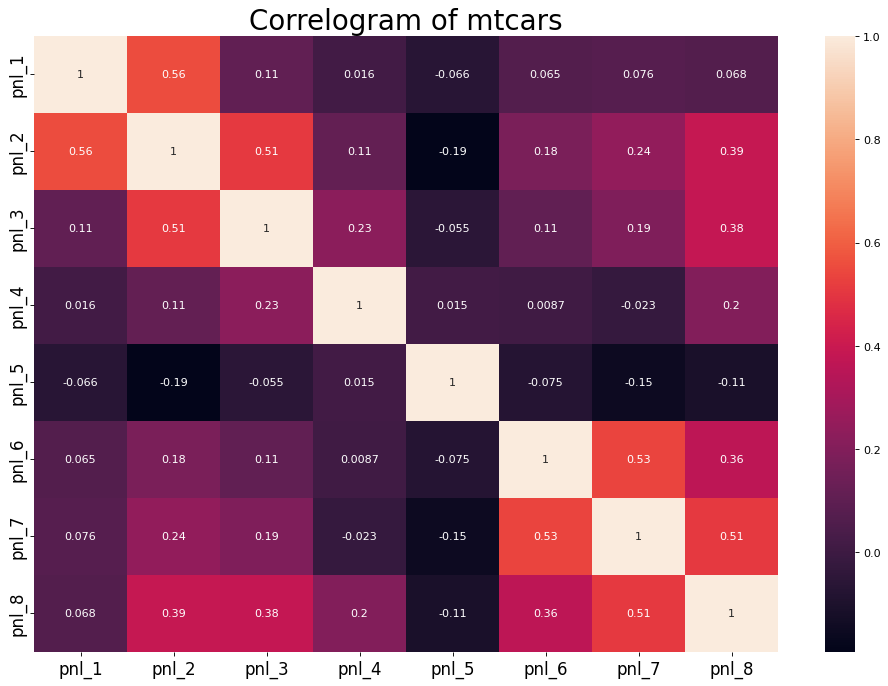

In [15]:
pnls_matrix = pd.DataFrame()
pnls_matrix['pnl_1'] = mtr.get_pnl(data_returns, a311_matrix, 1)
pnls_matrix['pnl_2'] = mtr.get_pnl(data_returns, a312_matrix, 1)
pnls_matrix['pnl_3'] = mtr.get_pnl(data_returns, -a41_matrix, 1)
pnls_matrix['pnl_4'] = mtr.get_pnl(data_returns, -a61_matrix, 1)
pnls_matrix['pnl_5'] = mtr.get_pnl(data_returns, -a2_matrix, 1)
pnls_matrix['pnl_6'] = mtr.get_pnl(data_returns, a612_matrix, 1)
pnls_matrix['pnl_7'] = mtr.get_pnl(data_returns, a613_matrix, 1)
pnls_matrix['pnl_8'] = mtr.get_pnl(data_returns, a611_matrix, 1)
plt.figure(figsize=(15,10), dpi=80)
sns.heatmap(pnls_matrix.corr(), annot=True)
plt.title('Correlogram of mtcars', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


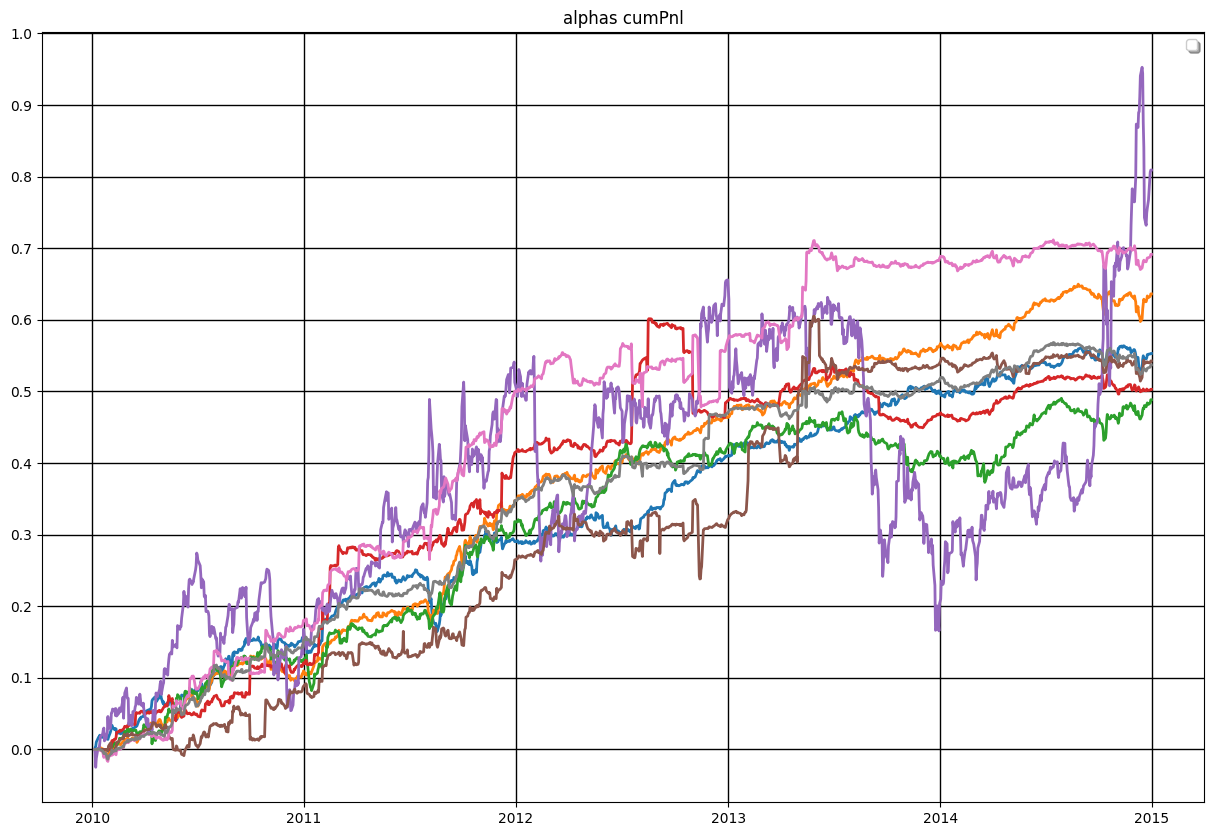

In [16]:
plt.rcParams['font.size'] = '10'
fig, ax = plt.subplots()
ax.plot()
ax.plot(pnls_matrix['pnl_1'].cumsum(), linewidth=2, label='')
ax.plot(pnls_matrix['pnl_2'].cumsum(), linewidth=2, label='')
ax.plot(pnls_matrix['pnl_3'].cumsum(), linewidth=2, label='')
ax.plot(pnls_matrix['pnl_4'].cumsum(), linewidth=2, label='')
ax.plot(pnls_matrix['pnl_5'].cumsum(), linewidth=2, label='')
ax.plot(pnls_matrix['pnl_6'].cumsum(), linewidth=2, label='')
ax.plot(pnls_matrix['pnl_7'].cumsum(), linewidth=2, label='')
ax.plot(pnls_matrix['pnl_8'].cumsum(), linewidth=2, label='')

ax.grid(color = 'black', linewidth = 1, linestyle = '-')    
plt.legend(loc = 'best', fancybox = True, shadow = True)


#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.1))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.1))  # интервал написания значений оси OY

plt.xticks(rotation=0)

fig.set_figwidth(15)
fig.set_figheight(10)

plt.title(f'alphas cumPnl')
plt.show()

##### Uniform portfolio

0.845733538362064


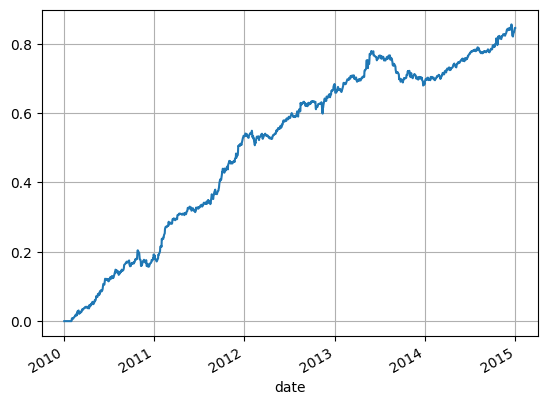

[0313/201249.928895:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0
[0313/201250.340236:WARNING:sandbox_linux.cc(393)] InitializeSandbox() called with multiple threads in process gpu-process.
41187 bytes written to file /tmp/tmpc5cjq0wj/temp.png


In [17]:
uniform_portfolio = normalize(neutralize((-a2_matrix + a311_matrix + a312_matrix - a41_matrix - a61_matrix + a611_matrix + a612_matrix + a613_matrix) / 8))
dfi.export(mtr.alpha_stats(data_returns, uniform_portfolio), 'picture/uniform_portfolio_stats.png')

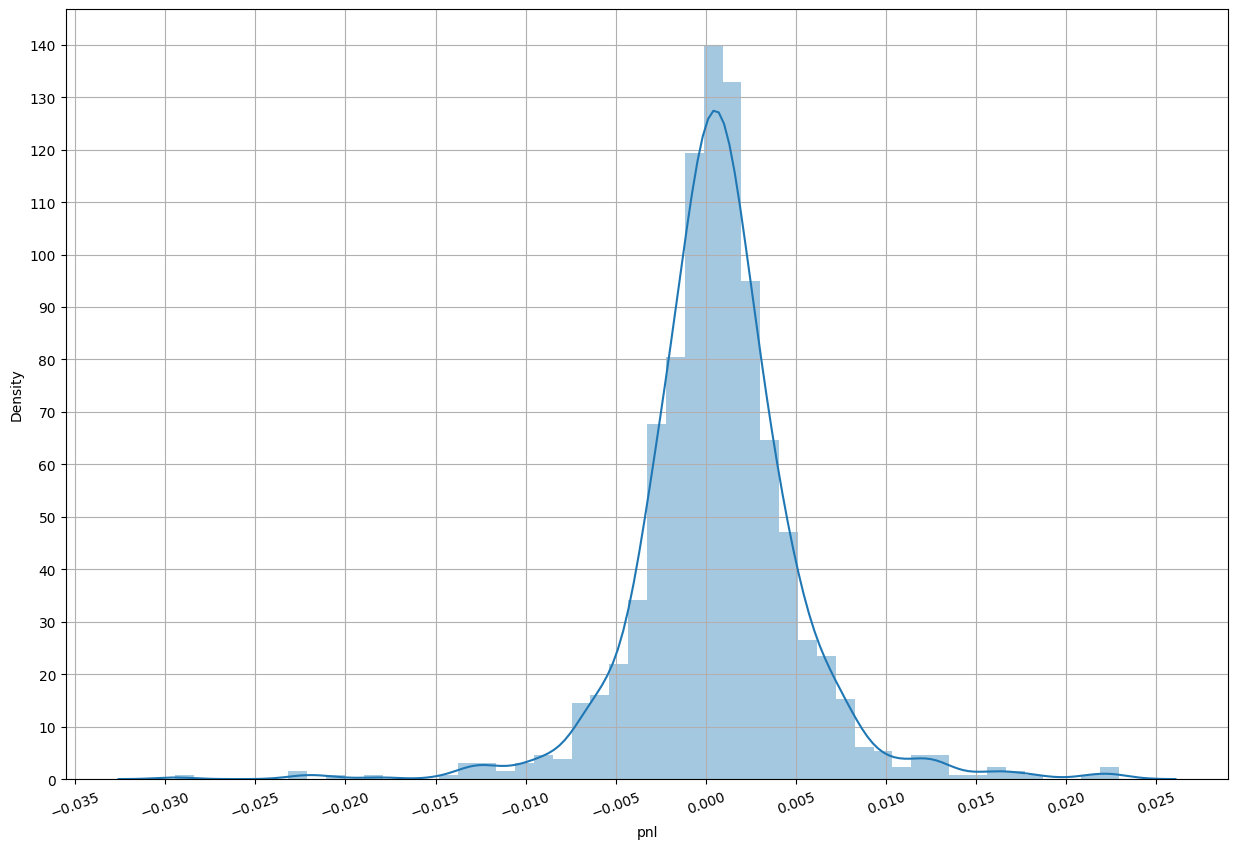

In [18]:
sns_plot = sns.distplot(mtr.get_pnl(data_returns, uniform_portfolio, 1)['pnl'])
plt.rcParams['font.size'] = '20'
fig = sns_plot.get_figure()
plt.grid()
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.005))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OY
plt.xticks(rotation=20)
fig.set_figwidth(15)
fig.set_figheight(10)